## Skoltech
## Intro to data science, fall 2022
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://forms.gle/4q7o3aBVduyPgWzv9

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza: https://piazza.com/class/l8q9rqodz872zj

## Dataset

This dataset concerns credit card applications. It has a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. General goal is to predict which people in the dataset are successful in applying for a credit card.

#### Attributes

-   Gender: 0=Female, 1=Male
-   Age: Age in years
-   Debt: Outstanding debt
-   Married: 0=Single/Divorced/etc, 1=Married
-   BankCustomer: 0=does not have a bank account, 1=has a bank account
-   Investment score: a number from 0 to 10
-   BankRecord
-   Industry: job sector of current or most recent job
-   Ethnicity
-   YearsEmployed
-   PriorDefault: 0=no prior defaults, 1=prior default
-   Employed: 0=not employed, 1=employed
-   CreditScore
-   DriversLicense: 0=no license, 1=has license
-   Citizenship: either ByBirth, ByOtherMeans or Temporary
-   ZipCode: 5 digit number
-   Income
-   Approved: 0=not approved, 1=approved

#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Read the data

In [2]:
df = pd.read_csv('C://Users/Nikolay/Downloads/credit_score_dataset.csv')

## 1. Data exploration

Let's take a closer look at the data.

In [3]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


### Q1.1

#### How many columns in the dataset?

In [4]:
df.shape[1]

18

### Q1.2

#### How many unique ethnicities are there?

In [5]:
df.Ethnicity.nunique()

5

### Q1.3
#### What is the average age? Please answer with an integer. Please, use int().

In [6]:
int(df.Age.mean())

31

### Q1.4
#### People working in which industry are getting the most income on average?

In [7]:
df.groupby(['Industry']).agg({'Income':'mean'}) \
    .rename(columns={'Income':'Average_income'}) \
    .sort_values(by=['Average_income'], ascending = False)

,Average_income
Industry,
Transport,10473.666667
Education,3042.840000
Healthcare,2349.584906
InformationTechnology,1928.121951
Utilities,1095.000000
Materials,1000.371795
CommunicationServices,887.368421
Energy,780.897260
Industrials,632.906250


### Q1.5

#### Assuming that column 'YearsEmployed' counts years from the first employment until the current moment, in what age people start working? Build a histogram for the age of the first employment. What is the average age to start working at? Please, answer with a float.

In [8]:
df['First_employment'] = df['Age'] - df['YearsEmployed']

<AxesSubplot:>

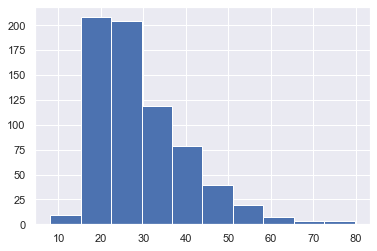

In [9]:
df.First_employment.hist()

In [10]:
round(float(df.First_employment.mean()), 3)

29.291

### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for columns from ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income'] with 'Approved' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how loan application approval relates to other features. Note, you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) People over 40 years old have less debt than people under 40 years old
- (b) A credit application with low credit score is approved almost always
- (c) There is no clear dependence between debt and years employed
- (d) High income means high credit score

a) True
b) False
с) True
d) False

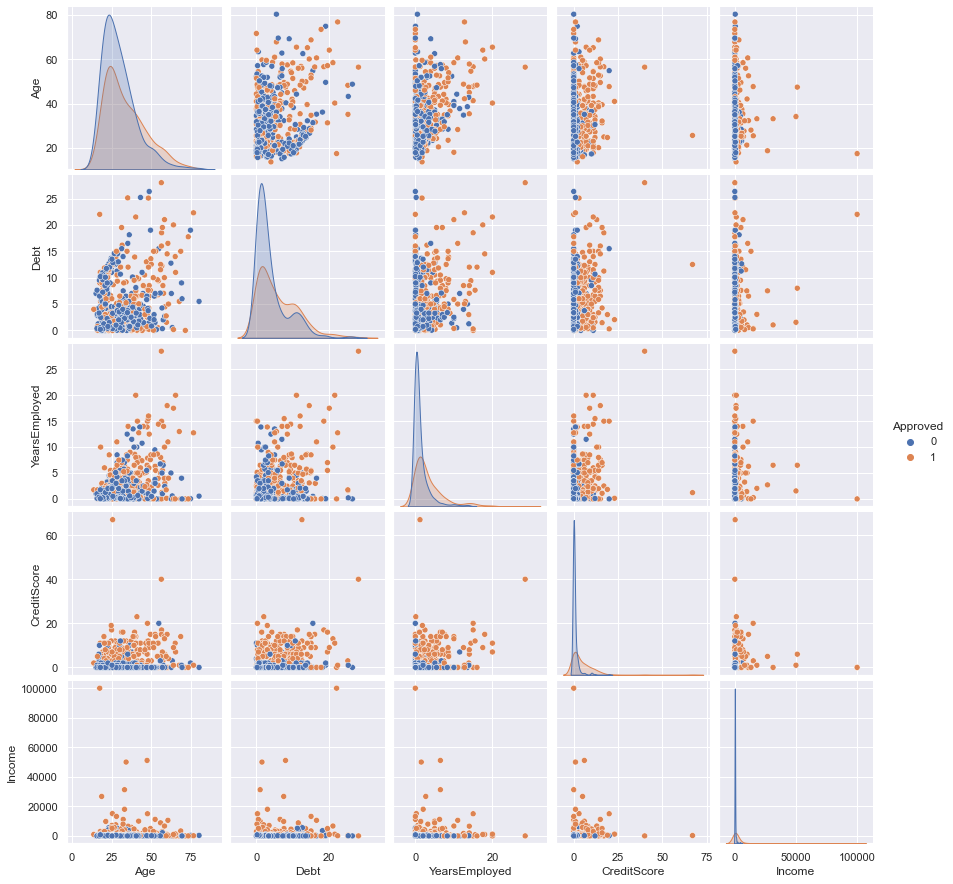

In [11]:
sns.pairplot(df[['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income', 'Approved']], \
             hue = "Approved", kind='scatter')

C:\Users\Nikolay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Debt', ylabel='Density'>

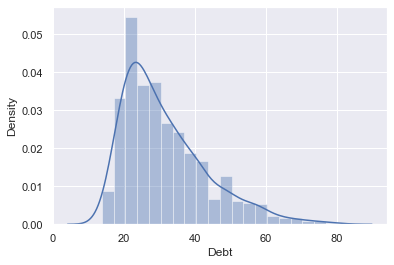

In [12]:
sns.distplot(df['Debt'], x = df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Debt'>

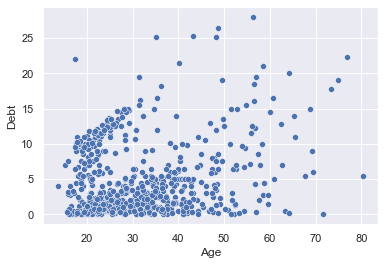

In [13]:
sns.scatterplot(data = df, x = 'Age', y = 'Debt')

<AxesSubplot:xlabel='Debt', ylabel='YearsEmployed'>

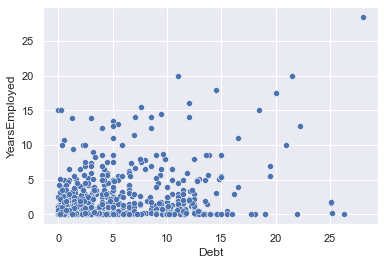

In [14]:
sns.scatterplot(data = df, x = 'Debt', y = 'YearsEmployed')

In [15]:
from scipy import stats
stats.pearsonr(df['Debt'], df['YearsEmployed'])

(0.29890155766577936, 1.0458451782147564e-15)

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

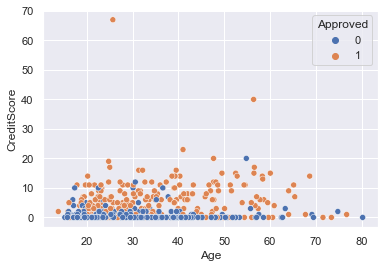

In [16]:
sns.scatterplot(data = df, x = 'Age', y = 'CreditScore', hue= 'Approved')

### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for ethnicity and industry. How many Latino people are working in healthcare?

In [17]:
pd.crosstab(df['Ethnicity'],  df['Industry'])

Industry,CommunicationServices,ConsumerDiscretionary,ConsumerStaples,Education,Energy,Financials,Healthcare,Industrials,InformationTechnology,Materials,Real Estate,Research,Transport,Utilities
Ethnicity,,,,,,,,,,,,,,
Asian,3,32,2,2,14,1,0,1,1,0,2,0,0,1
Black,2,10,2,4,27,12,0,7,17,29,6,0,1,21
Latino,0,0,0,0,0,2,52,0,1,0,0,2,0,0
Other,0,1,0,14,2,0,1,0,0,1,0,7,2,0
White,33,16,50,5,103,36,0,56,22,48,22,1,0,16


In [18]:
pd.crosstab(df['Ethnicity'],  df['Industry']).query('Ethnicity == "Latino"')['Healthcare']

Ethnicity
Latino    52
Name: Healthcare, dtype: int64

## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that are exactly the same for all of the people. Let's drop one of them. As an answer, write the names of these columns divided by a comma.

In [19]:
(df.BankRecord == df.BankCustomer).sum()

690

In [20]:
df.drop(columns = ['BankRecord'], inplace = True)

BankRecord, BankCustomer

### Q2.2

Now it's time to talk about the task for today. Our bank wants to predict whether the application for a loan is worthy or not. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'Approved' column) and data (the rest of the columns). How many positive labels are there in target?


In [21]:
X = df.drop(columns=['Approved'])
y = df.Approved
y.value_counts()

0    383
1    307
Name: Approved, dtype: int64

### Q2.3

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 314 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [22]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, \
                                                    random_state = 314, shuffle = True, \
                                                    stratify = y)
y_test.value_counts()

0    115
1     92
Name: Approved, dtype: int64

## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, k neighbors classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form as categorical, so let's make a copy of x with the following columns for the section:

'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'

In [23]:
X_train = X_train[['Gender', 'Age', 'Debt', 'Married', \
                  'BankCustomer', 'InvestmentScore', \
                  'YearsEmployed', 'PriorDefault', 'Employed', \
                  'CreditScore', 'DriversLicense', 'ZipCode', 'Income']].copy()

X_test = X_test[['Gender', 'Age', 'Debt', 'Married', \
                  'BankCustomer', 'InvestmentScore', \
                  'YearsEmployed', 'PriorDefault', 'Employed', \
                  'CreditScore', 'DriversLicense', 'ZipCode', 'Income']].copy()

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import f1_score

In [25]:
log_reg = LogisticRegression(max_iter = 5000, random_state = 314)
log_reg.fit(X_train, y_train)
f1_score(y_test, log_reg.predict(X_test))

0.8617021276595744

### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
f1_score(y_test, knn.predict(X_test))

0.6134969325153373

### Q3.3

Build a random forest classifier with n_estimators = 5. What is the f1_score for the model?

In [27]:
RF = RandomForestClassifier(n_estimators = 5, random_state = 314)
RF.fit(X_train, y_train)
f1_score(y_test, RF.predict(X_test))

0.8333333333333333

### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. You can use verbose argument of GridSearchCV in order to watch the progress of cross-validation. What is the f1 score for the model trained on the full train dataset with this regularization?

In [28]:
regul_reg = LogisticRegression(max_iter = 5000, penalty='l2', random_state=314)

reg_param = {'C': np.linspace(0.001, 1000, 1000)}

regul_cv = GridSearchCV(param_grid=reg_param, estimator = regul_reg, scoring = 'f1', cv = 5, verbose=1, n_jobs = -1)

regul_cv.fit(X_train, y_train)

regul_cv.best_score_, regul_cv.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


(0.8356957476679879, {'C': 58.059000000000005})

In [29]:
f1_score(y_test, regul_cv.best_estimator_.predict(X_test))

0.8677248677248677

### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

In [30]:
kNN_tuned = KNeighborsClassifier()

kNN_param = {'n_neighbors': range(1,10,1), 'p': [1, 2], 'weights' :['uniform', 'distance'] }

kNN_cv = GridSearchCV(param_grid=kNN_param, estimator = kNN_tuned, scoring = 'f1', cv = 5, verbose=1, n_jobs = -1)

kNN_cv.fit(X_train, y_train)

kNN_cv.best_score_, kNN_cv.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


(0.6336898457105311, {'n_neighbors': 4, 'p': 1, 'weights': 'distance'})

In [31]:
f1_score(y_test, kNN_cv.best_estimator_.predict(X_test))

0.6455696202531646

### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

In [32]:
RF_tuned = RandomForestClassifier(random_state = 314)

RF_param = {'n_estimators': range(1,10,1), 'max_features': ['sqrt', 'log2', None] }

RF_cv = GridSearchCV(param_grid=RF_param, estimator = RF_tuned, scoring = 'f1', cv = 5, verbose=1, n_jobs = -1)

RF_cv.fit(X_train, y_train)

RF_cv.best_score_, RF_cv.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


(0.8230500202273291, {'max_features': None, 'n_estimators': 7})

In [33]:
f1_score(y_test, RF_cv.best_estimator_.predict(X_test))

0.8524590163934426

## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income'. 

What is the maximum value of Income now in the test set?

In [34]:
scaler = StandardScaler()
X_num_scaled_train = scaler.fit_transform(X_train[['Age', 'Debt', 'YearsEmployed', \
                                              'InvestmentScore', 'CreditScore', \
                                              'ZipCode', 'Income']])

X_num_scaled_test = scaler.transform(X_test[['Age', 'Debt', 'YearsEmployed', \
                                            'InvestmentScore', 'CreditScore', \
                                            'ZipCode', 'Income']])

In [35]:
X_num_scaled_test[:, -1].max()

0.864108203682489

### Q4.2
We have three categorical columns - 'Industry', 'Ethnicity' and 'Citizen'. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Industry', 'Ethnicity' and 'Citizen' columns.

How many columns do we have now?

In [36]:
X_cat = pd.get_dummies(X, columns = ['Industry', 'Ethnicity','Citizen'])

In [37]:
X_cat.head()

,Gender,Age,Debt,Married,BankCustomer,InvestmentScore,YearsEmployed,PriorDefault,Employed,CreditScore,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,1,30.83,0.000,1,1,3.65,1.25,1,1,1,...,0,0,0,0,0,0,1,1,0,0
1,0,58.67,4.460,1,1,1.94,3.04,1,1,6,...,0,0,0,1,0,0,0,1,0,0
2,0,24.50,0.500,1,1,8.15,1.50,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,27.83,1.540,1,1,7.99,3.75,1,1,5,...,0,0,0,0,0,0,1,1,0,0
4,1,20.17,5.625,1,1,2.37,1.71,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
X_cat.shape

(690, 36)

In [67]:
X_cat.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore',
       'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'ZipCode', 'Income', 'First_employment',
       'Industry_CommunicationServices', 'Industry_ConsumerDiscretionary',
       'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy',
       'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Transport',
       'Industry_Utilities', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White',
       'Citizen_ByBirth', 'Citizen_ByOtherMeans', 'Citizen_Temporary'],
      dtype='object')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size = 0.3, \
                                                    random_state = 314, shuffle = True, \
                                                    stratify = y)

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Q4.3

To check the effects of the modification, train the logistic regression with **updated** optimal C. What is the f1 score now?

In [41]:
regul_reg = LogisticRegression(max_iter = 5000, penalty='l2', random_state=314)

reg_param = {'C': np.linspace(0.001, 1000, 1000)}

regul_cv = GridSearchCV(param_grid=reg_param, estimator = regul_reg, scoring = 'f1', cv = 5, verbose=1, n_jobs = -1)

regul_cv.fit(X_train_scaled, y_train)

regul_cv.best_score_, regul_cv.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


(0.8377983559040754, {'C': 2.003})

In [42]:
f1_score(y_test, regul_cv.predict(X_test_scaled))

0.870967741935484

### Q4.4

Another popular performance metric is the ROC curve. Train a k-NN and logistic regression with **updated** optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## aiming to the roc_auc

In [44]:
kNN_tuned = KNeighborsClassifier()

kNN_param = {'n_neighbors': range(1,15,1), 'p': [1, 2, 3], 'weights' :['uniform', 'distance'] }

kNN_cv = GridSearchCV(param_grid=kNN_param, estimator = kNN_tuned, scoring = 'roc_auc', cv = 5, verbose=1, n_jobs = -1)

kNN_cv.fit(X_train_scaled, y_train)

kNN_cv.best_score_, kNN_cv.best_params_

Fitting 5 folds for each of 84 candidates, totalling 420 fits


(0.8738091755643312, {'n_neighbors': 14, 'p': 1, 'weights': 'distance'})

In [45]:
regul_reg = LogisticRegression(max_iter = 5000, penalty='l2', random_state=314)

reg_param = {'C': np.linspace(0.001, 1000, 1000)}

regul_cv = GridSearchCV(param_grid=reg_param, estimator = regul_reg, scoring='roc_auc', cv = 5, verbose=1, n_jobs = -1)

regul_cv.fit(X_train_scaled, y_train)

regul_cv.best_score_, regul_cv.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


(0.9155591308728649, {'C': 13.014000000000001})

In [46]:
FP_knn, TP_knn, thresholds_knn = roc_curve(y_test, kNN_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1])
FP_log, TP_log, thresholds_reg = roc_curve(y_test, regul_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1])

In [47]:
print(f"FP_KNN:{round(FP_knn[1],3)}, TP_KNN:{round(TP_knn[1],3)}\nFP_LR:{round(FP_log[1],3)}, TP_LR:{round(TP_log[1],3)}")

FP_KNN:0.009, TP_KNN:0.076
FP_LR:0.0, TP_LR:0.011


In [48]:
import warnings
warnings.filterwarnings('ignore')

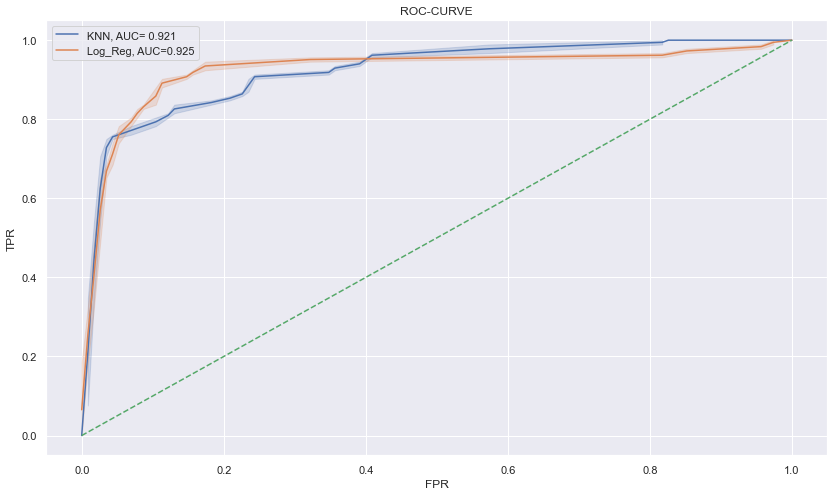

In [49]:
plt.figure(figsize = (14,8))
auc = roc_auc_score(y_test, kNN_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1])
sns.lineplot(FP_knn, TP_knn, label=f"KNN, AUC= {round(auc,3)}")

auc = roc_auc_score(y_test, regul_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1])
sns.lineplot(FP_log, TP_log, label=f"Log_Reg, AUC={round(auc,3)}")

plt.plot(np.linspace(0,1, 10), np.linspace(0,1, 10), '--g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-CURVE');

In [50]:
f1_score(y_test, kNN_cv.best_estimator_.predict(X_test_scaled))

0.8372093023255814

In [51]:
f1_score(y_test, regul_cv.best_estimator_.predict(X_test_scaled))

0.870967741935484

## Aiming to f1 score

In [52]:
kNN_tuned = KNeighborsClassifier()

kNN_param = {'n_neighbors': range(1,15,1), 'p': [1, 2, 3], 'weights' :['uniform', 'distance'] }

kNN_cv = GridSearchCV(param_grid=kNN_param, estimator = kNN_tuned, scoring = 'f1', cv = 5, verbose=1, n_jobs = -1)

kNN_cv.fit(X_train_scaled, y_train)

kNN_cv.best_score_, kNN_cv.best_params_

Fitting 5 folds for each of 84 candidates, totalling 420 fits


(0.7649983588176987, {'n_neighbors': 13, 'p': 1, 'weights': 'distance'})

In [53]:
regul_reg = LogisticRegression(max_iter = 5000, penalty='l2', random_state=314)

reg_param = {'C': np.linspace(0.001, 1000, 1000)}

regul_cv = GridSearchCV(param_grid=reg_param, estimator = regul_reg, scoring='f1', cv = 5, verbose=1, n_jobs = -1)

regul_cv.fit(X_train_scaled, y_train)

regul_cv.best_score_, regul_cv.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


(0.8377983559040754, {'C': 2.003})

In [54]:
FP_knn, TP_knn, thresholds_knn = roc_curve(y_test, kNN_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1])
FP_log, TP_log, thresholds_reg = roc_curve(y_test, regul_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1])

In [55]:
print(f"FP_KNN:{round(FP_knn[1],3)}, TP_KNN:{round(TP_knn[1],3)}\nFP_LR:{round(FP_log[1],3)}, TP_LR:{round(TP_log[1],3)}")

FP_KNN:0.009, TP_KNN:0.12
FP_LR:0.0, TP_LR:0.011


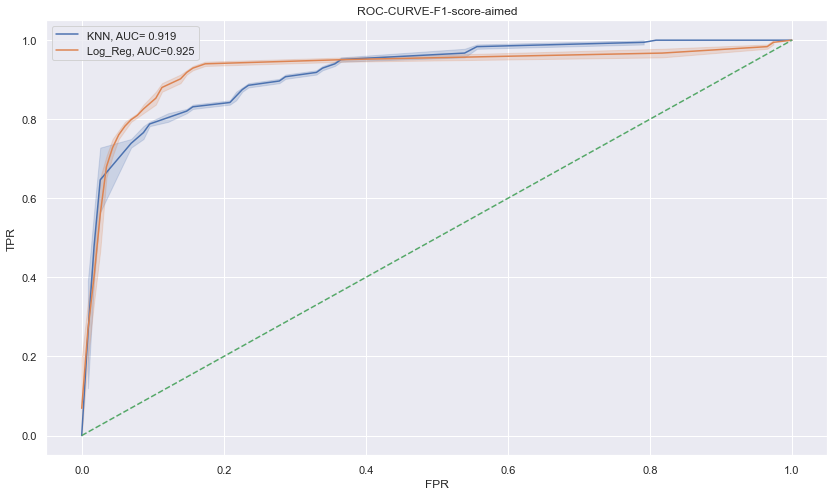

In [56]:
plt.figure(figsize = (14,8))
auc = roc_auc_score(y_test, kNN_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1])
sns.lineplot(FP_knn, TP_knn, label=f"KNN, AUC= {round(auc,3)}")

auc = roc_auc_score(y_test, regul_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1])
sns.lineplot(FP_log, TP_log, label=f"Log_Reg, AUC={round(auc,3)}")

plt.plot(np.linspace(0,1, 10), np.linspace(0,1, 10), '--g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-CURVE-F1-score-aimed');

In [57]:
f1_score(y_test, kNN_cv.best_estimator_.predict(X_test_scaled))

0.813953488372093

In [58]:
f1_score(y_test, regul_cv.best_estimator_.predict(X_test_scaled))

0.870967741935484

### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance?

<AxesSubplot:>

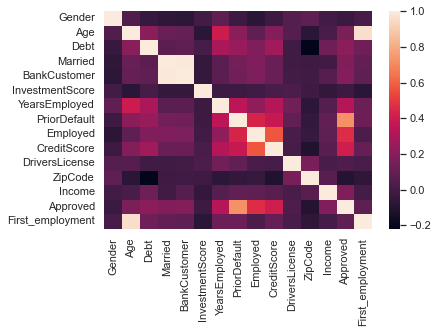

In [59]:
sns.heatmap(df.corr())

In [60]:
df.corr()['Approved']

Gender             -0.028934
Age                 0.164086
Debt                0.206294
Married             0.180583
BankCustomer        0.188964
InvestmentScore    -0.024591
YearsEmployed       0.322475
PriorDefault        0.720407
Employed            0.458301
CreditScore         0.406410
DriversLicense      0.031625
ZipCode            -0.099598
Income              0.175657
Approved            1.000000
First_employment    0.078881
Name: Approved, dtype: float64

<AxesSubplot:xlabel='Income', ylabel='Density'>

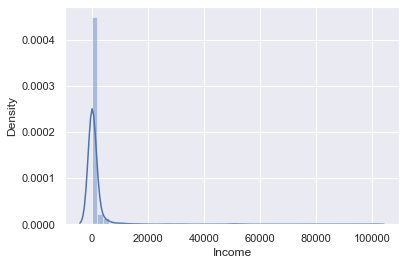

In [61]:
sns.distplot(df['Income'])  # as we can see it has a lot of outliers, so let's log this

<AxesSubplot:xlabel='Income', ylabel='Density'>

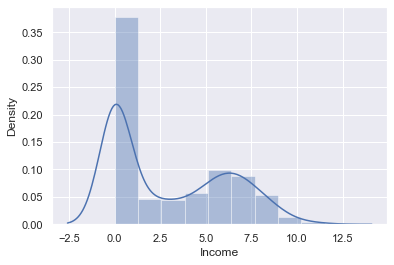

In [62]:
sns.distplot(np.log(df.Income + 1))  # now it's much prettier

In [63]:
df['Employed_Priordefault'] = (df['PriorDefault'] == 1) & (df['Employed'] == 1)

In [64]:
df['log_Income'] = np.log(df.Income + 1)

In [68]:
df.drop(columns = ['Income'], inplace = True)

In [69]:
X = df.drop(columns = ['Approved'])
y = df.Approved

In [70]:
X_cat_new = pd.get_dummies(X, columns = ['Industry', 'Ethnicity','Citizen', 'Employed_Priordefault'])

In [71]:
X_cat_new.head()

,Gender,Age,Debt,Married,BankCustomer,InvestmentScore,YearsEmployed,PriorDefault,Employed,CreditScore,...,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary,Employed_Priordefault_False,Employed_Priordefault_True
0,1,30.83,0.000,1,1,3.65,1.25,1,1,1,...,0,0,0,0,1,1,0,0,0,1
1,0,58.67,4.460,1,1,1.94,3.04,1,1,6,...,0,1,0,0,0,1,0,0,0,1
2,0,24.50,0.500,1,1,8.15,1.50,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,1,27.83,1.540,1,1,7.99,3.75,1,1,5,...,0,0,0,0,1,1,0,0,0,1
4,1,20.17,5.625,1,1,2.37,1.71,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [72]:
pd.concat([X_cat_new, y], axis = 1).corr()['Approved']

Gender                           -0.028934
Age                               0.164086
Debt                              0.206294
Married                           0.180583
BankCustomer                      0.188964
InvestmentScore                  -0.024591
YearsEmployed                     0.322475
PriorDefault                      0.720407
Employed                          0.458301
CreditScore                       0.406410
DriversLicense                    0.031625
ZipCode                          -0.099598
First_employment                  0.078881
log_Income                        0.326583
Industry_CommunicationServices   -0.011598
Industry_ConsumerDiscretionary   -0.127762
Industry_ConsumerStaples         -0.054574
Industry_Education                0.044896
Industry_Energy                   0.007430
Industry_Financials              -0.096879
Industry_Healthcare              -0.181588
Industry_Industrials              0.045487
Industry_InformationTechnology    0.132708
Industry_Ma

In [73]:
X_train_2, X_test_2, y_train, y_test = train_test_split(X_cat_new, y, test_size = 0.3, \
                                                    random_state = 314, shuffle = True, \
                                                    stratify = y)

In [74]:
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

In [75]:
regul_reg = LogisticRegression(max_iter = 5000, penalty='l2', random_state=314)

reg_param = {'C': np.linspace(0.001, 1000, 1000)}

regul_cv = GridSearchCV(param_grid=reg_param, estimator = regul_reg, scoring='roc_auc', cv = 5, verbose=1, n_jobs = -1)

regul_cv.fit(X_train_scaled_2, y_train)

regul_cv.best_score_, regul_cv.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


(0.9170591389985863, {'C': 295.296})

In [76]:
kNN_tuned = KNeighborsClassifier()

kNN_param = {'n_neighbors': range(1,15,1), 'p': [1, 2, 3], 'weights' :['uniform', 'distance'] }

kNN_cv = GridSearchCV(param_grid=kNN_param, estimator = kNN_tuned, scoring = 'roc_auc', cv = 5, verbose=1, n_jobs = -1)

kNN_cv.fit(X_train_scaled_2, y_train)

kNN_cv.best_score_, kNN_cv.best_params_

Fitting 5 folds for each of 84 candidates, totalling 420 fits


(0.8920189166788551, {'n_neighbors': 14, 'p': 1, 'weights': 'distance'})

In [77]:
FP_knn, TP_knn, thresholds_knn = roc_curve(y_test, kNN_cv.best_estimator_.predict_proba(X_test_scaled_2)[:, 1])
FP_log, TP_log, thresholds_reg = roc_curve(y_test, regul_cv.best_estimator_.predict_proba(X_test_scaled_2)[:, 1])

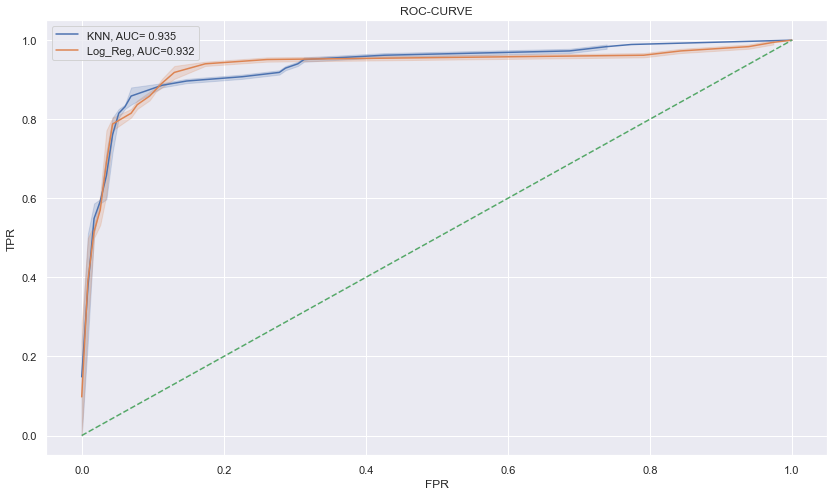

In [78]:
plt.figure(figsize = (14,8))

auc = roc_auc_score(y_test, kNN_cv.best_estimator_.predict_proba(X_test_scaled_2)[:, 1])
sns.lineplot(FP_knn, TP_knn, label=f"KNN, AUC= {round(auc,3)}")

auc = roc_auc_score(y_test, regul_cv.best_estimator_.predict_proba(X_test_scaled_2)[:, 1])
sns.lineplot(FP_log, TP_log, label=f"Log_Reg, AUC={round(auc,3)}")

plt.plot(np.linspace(0,1, 10), np.linspace(0,1, 10), '--g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-CURVE');


In [79]:
f1_score(y_test, kNN_cv.best_estimator_.predict(X_test_scaled_2))

0.8685714285714285

In [80]:
f1_score(y_test, regul_cv.best_estimator_.predict(X_test_scaled_2))

0.870967741935484

## Aiming to f1 score

In [81]:
regul_reg = LogisticRegression(max_iter = 5000, penalty='l2', random_state=314)

reg_param = {'C': np.linspace(0.001, 1000, 1000)}

regul_cv = GridSearchCV(param_grid=reg_param, estimator = regul_reg, scoring='f1', cv = 5, verbose=1, n_jobs = -1)

regul_cv.fit(X_train_scaled_2, y_train)

regul_cv.best_score_, regul_cv.best_params_

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


(0.8293433128397043, {'C': 20.021000000000004})

In [82]:
kNN_tuned = KNeighborsClassifier()

kNN_param = {'n_neighbors': range(1,15,1), 'p': [1, 2, 3], 'weights' :['uniform', 'distance'] }

kNN_cv = GridSearchCV(param_grid=kNN_param, estimator = kNN_tuned, scoring = 'f1', cv = 5, verbose=1, n_jobs = -1)

kNN_cv.fit(X_train_scaled_2, y_train)

kNN_cv.best_score_, kNN_cv.best_params_

Fitting 5 folds for each of 84 candidates, totalling 420 fits


(0.7990106592559192, {'n_neighbors': 12, 'p': 1, 'weights': 'distance'})

In [83]:
FP_knn, TP_knn, thresholds_knn = roc_curve(y_test, kNN_cv.best_estimator_.predict_proba(X_test_scaled_2)[:, 1])
FP_log, TP_log, thresholds_reg = roc_curve(y_test, regul_cv.best_estimator_.predict_proba(X_test_scaled_2)[:, 1])

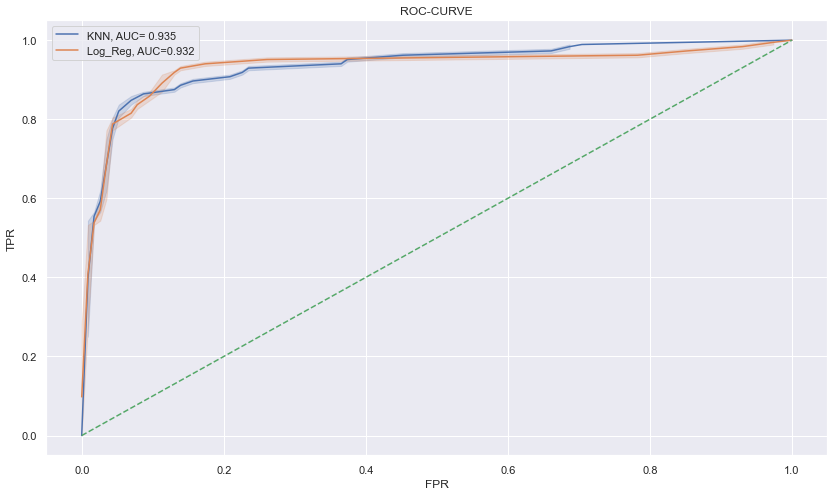

In [84]:
plt.figure(figsize = (14,8))

auc = roc_auc_score(y_test, kNN_cv.best_estimator_.predict_proba(X_test_scaled_2)[:, 1])
sns.lineplot(FP_knn, TP_knn, label=f"KNN, AUC= {round(auc,3)}")

auc = roc_auc_score(y_test, regul_cv.best_estimator_.predict_proba(X_test_scaled_2)[:, 1])
sns.lineplot(FP_log, TP_log, label=f"Log_Reg, AUC={round(auc,3)}")

plt.plot(np.linspace(0,1, 10), np.linspace(0,1, 10), '--g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-CURVE');


In [85]:
f1_score(y_test, kNN_cv.best_estimator_.predict(X_test_scaled_2))

0.8700564971751413

In [86]:
f1_score(y_test, regul_cv.best_estimator_.predict(X_test_scaled_2))

0.870967741935484

### Q5.2

Train an xboost model with f1 score 0.8+

In [87]:
import xgboost as xgb

### without additional features

In [88]:
xgb_clf = xgb.XGBClassifier(random_state = 314)
xgb_clf.fit(X_train_scaled, y_train)
print('%.3f' % (f1_score(y_test, xgb_clf.predict(X_test_scaled))))

0.857


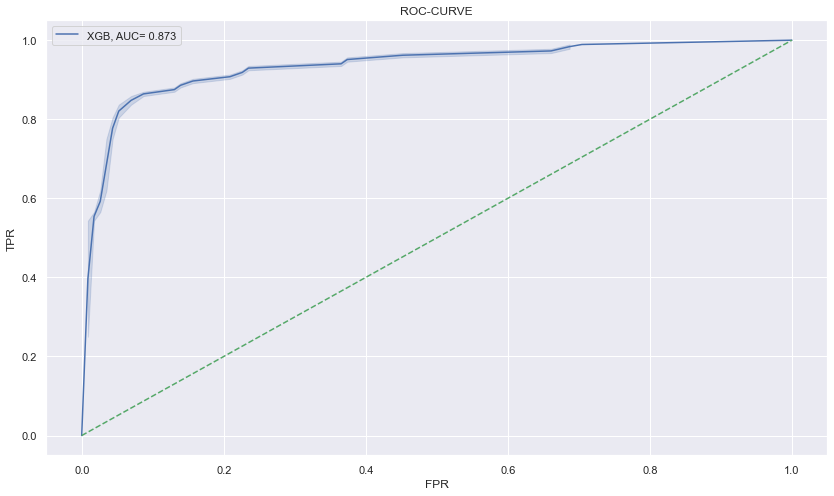

In [89]:
plt.figure(figsize = (14,8))

auc = roc_auc_score(y_test, xgb_clf.predict(X_test_scaled))
sns.lineplot(FP_knn, TP_knn, label=f"XGB, AUC= {round(auc,3)}")

plt.plot(np.linspace(0,1, 10), np.linspace(0,1, 10), '--g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-CURVE');

### with additional features

In [90]:
xgb_clf = xgb.XGBClassifier(random_state = 314)
xgb_clf.fit(X_train_scaled_2, y_train)
print('%.3f' % (f1_score(y_test, xgb_clf.predict(X_test_scaled_2))))

0.859


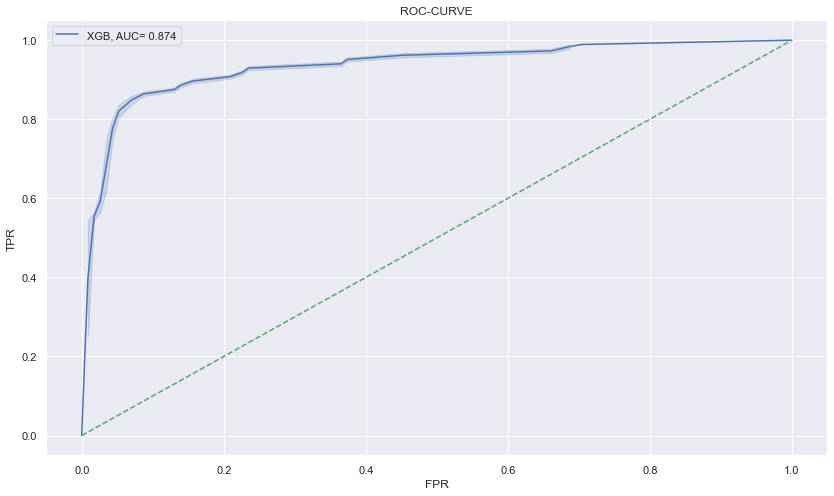

In [91]:
plt.figure(figsize = (14,8))

auc = roc_auc_score(y_test, xgb_clf.predict(X_test_scaled_2))
sns.lineplot(FP_knn, TP_knn, label=f"XGB, AUC= {round(auc,3)}")

plt.plot(np.linspace(0,1, 10), np.linspace(0,1, 10), '--g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-CURVE');

## Try to fit xgboost on roc_auc score

### with additional features

In [92]:
parameters = {'nthread':[2],
              'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.04, 0.06],
              'max_depth': range(1, 6, 1),
              'min_child_weight': range(1, 14, 1),
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000],  
              'seed': [314]}

In [93]:
xgb_tuned = xgb.XGBClassifier(random_state = 314)

xgb_cv = GridSearchCV(param_grid=parameters, estimator = xgb_tuned, scoring = 'roc_auc', cv = 5, verbose=1, n_jobs = -1)

xgb_cv.fit(X_train_scaled_2, y_train)

Fitting 5 folds for each of 195 candidates, totalling 975 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=314, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             p

In [94]:
xgb_cv.best_score_, xgb_cv.best_params_

(0.9294037345814441,
 {'colsample_bytree': 0.7,
  'learning_rate': 0.05,
  'max_depth': 1,
  'min_child_weight': 2,
  'n_estimators': 1000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 314,
  'subsample': 0.8})

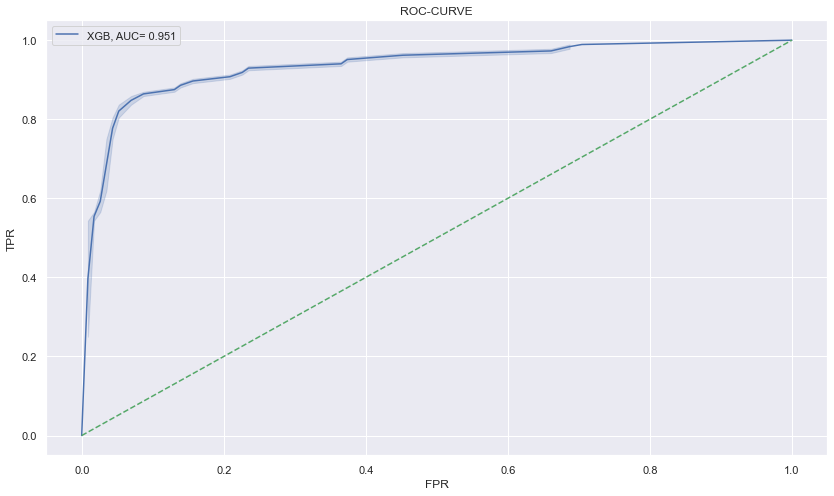

In [95]:
plt.figure(figsize = (14,8))

auc = roc_auc_score(y_test, xgb_cv.best_estimator_.predict_proba(X_test_scaled_2)[:, 1])
sns.lineplot(FP_knn, TP_knn, label=f"XGB, AUC= {round(auc,3)}")

plt.plot(np.linspace(0,1, 10), np.linspace(0,1, 10), '--g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-CURVE');

In [96]:
print('%.3f' % (f1_score(y_test, xgb_cv.best_estimator_.predict(X_test_scaled_2))))

0.851


### without additional features

In [97]:
xgb_tuned = xgb.XGBClassifier(random_state = 314)

xgb_cv = GridSearchCV(param_grid=parameters, estimator = xgb_tuned, scoring = 'roc_auc', cv = 5, verbose=1, n_jobs = -1)

xgb_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 195 candidates, totalling 975 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=314, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             p

In [98]:
xgb_cv.best_score_, xgb_cv.best_params_

(0.9289113158792842,
 {'colsample_bytree': 0.7,
  'learning_rate': 0.04,
  'max_depth': 1,
  'min_child_weight': 4,
  'n_estimators': 1000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 314,
  'subsample': 0.8})

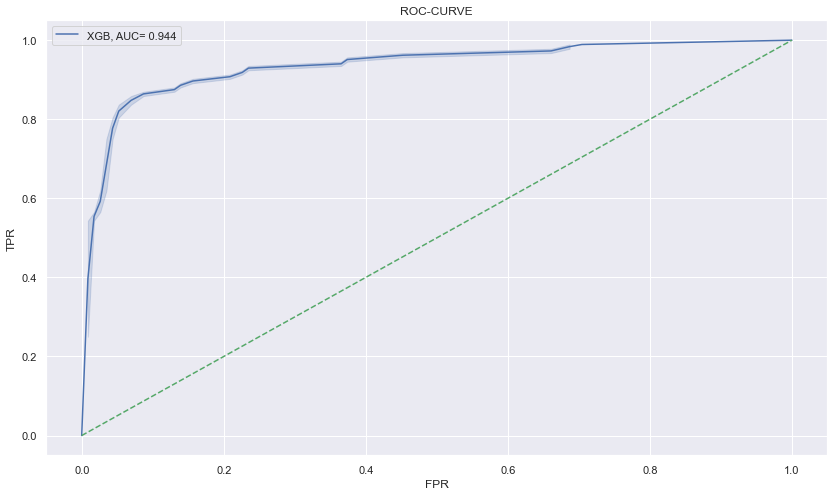

In [99]:
plt.figure(figsize = (14,8))

auc = roc_auc_score(y_test, xgb_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1])
sns.lineplot(FP_knn, TP_knn, label=f"XGB, AUC= {round(auc,3)}")

plt.plot(np.linspace(0,1, 10), np.linspace(0,1, 10), '--g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-CURVE');

In [100]:
print('%.3f' % (f1_score(y_test, xgb_cv.best_estimator_.predict(X_test_scaled))))

0.823


## Try to fit Xgboost on f1 score

### With additional features

In [101]:
xgb_tuned = xgb.XGBClassifier(random_state = 314)

xgb_cv = GridSearchCV(param_grid=parameters, estimator = xgb_tuned, scoring = 'f1', cv = 5, verbose=1, n_jobs = -1)

xgb_cv.fit(X_train_scaled_2, y_train)

Fitting 5 folds for each of 195 candidates, totalling 975 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=314, reg_alpha=None,
                              

In [102]:
xgb_cv.best_score_, xgb_cv.best_params_

(0.8453812456847525,
 {'colsample_bytree': 0.7,
  'learning_rate': 0.04,
  'max_depth': 1,
  'min_child_weight': 9,
  'n_estimators': 1000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 314,
  'subsample': 0.8})

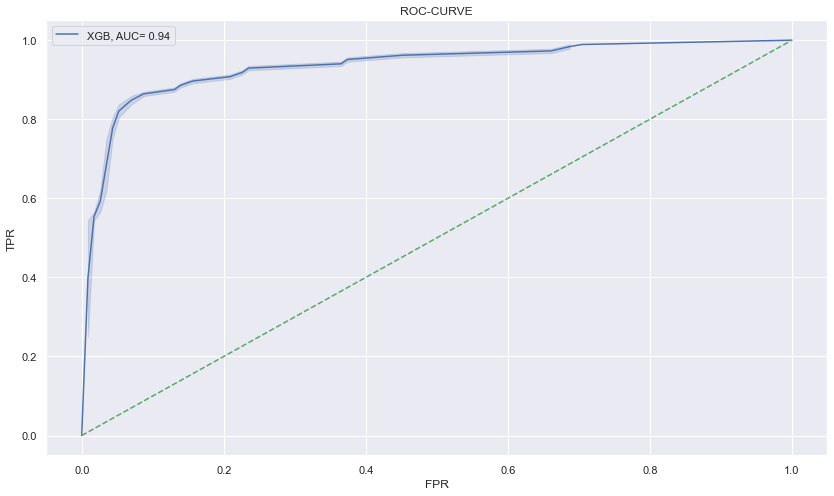

In [103]:
plt.figure(figsize = (14,8))

auc = roc_auc_score(y_test, xgb_cv.best_estimator_.predict_proba(X_test_scaled_2)[:, 1])
sns.lineplot(FP_knn, TP_knn, label=f"XGB, AUC= {round(auc,3)}")

plt.plot(np.linspace(0,1, 10), np.linspace(0,1, 10), '--g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-CURVE');

In [104]:
print('%.3f' % (f1_score(y_test, xgb_cv.best_estimator_.predict(X_test_scaled_2))))

0.847


### without additional features

In [105]:
xgb_tuned = xgb.XGBClassifier(random_state = 314)

xgb_cv = GridSearchCV(param_grid=parameters, estimator = xgb_tuned, scoring = 'f1', cv = 5, verbose=1, n_jobs = -1)

xgb_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 195 candidates, totalling 975 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=314, reg_alpha=None,
                              

In [106]:
xgb_cv.best_score_, xgb_cv.best_params_

(0.84116412918161,
 {'colsample_bytree': 0.7,
  'learning_rate': 0.04,
  'max_depth': 1,
  'min_child_weight': 10,
  'n_estimators': 1000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 314,
  'subsample': 0.8})

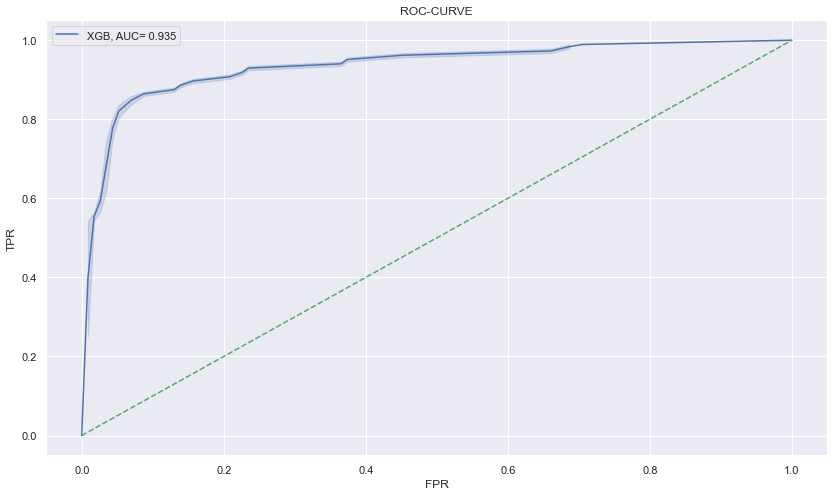

In [107]:
plt.figure(figsize = (14,8))

auc = roc_auc_score(y_test, xgb_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1])
sns.lineplot(FP_knn, TP_knn, label=f"XGB, AUC= {round(auc,3)}")

plt.plot(np.linspace(0,1, 10), np.linspace(0,1, 10), '--g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-CURVE');

In [108]:
print('%.3f' % (f1_score(y_test, xgb_cv.best_estimator_.predict(X_test_scaled))))

0.818
